In [1]:
from pathlib import Path
import pandas as pd
import matplotlib as plt

data_path = Path("tfevents")

In [24]:
networks = ["resnet101"]
# networks = ["resnet101", "resnet101_no_pretrained"]
scenaries = [100, 300, 500, 1000, 3000, 4874]

metric = "DetectionBoxes_Precision/mAP@.75IOU"

training_history = pd.DataFrame()
results = pd.DataFrame(columns = networks, index = scenaries)
for network in networks:
    for scenary in scenaries:
        data = pd.read_csv(data_path/network/f"{scenary}"/"converted"/f"eval{scenary}.csv")
        training_history[f"{scenary}"] = data[metric]
        best_result = data[metric].max()
        results.loc[scenary, network] = best_result
training_history.index = 1000*(training_history.index + 1)

Text(0.5, 1.0, 'Test set evaluations fro ResNet-101')

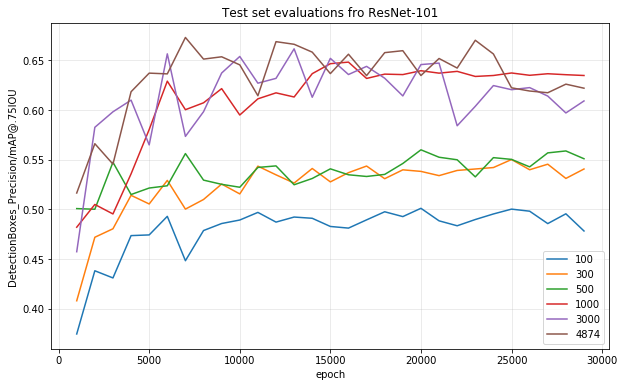

In [25]:
ax = training_history.plot(figsize = (10, 6))
ax.grid(alpha = 0.3)
ax.set_xlabel("epoch")
ax.set_ylabel(metric)
ax.set_title("Test set evaluations fro ResNet-101")

Text(0, 0.5, 'DetectionBoxes_Precision/mAP@.75IOU')

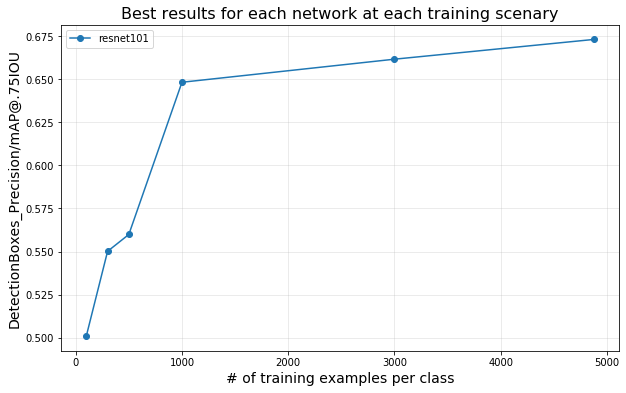

In [26]:
ax = results.plot(style = "-o", figsize = (10, 6))
ax.grid(alpha = 0.3)
ax.set_title("Best results for each network at each training scenary", fontsize = 16)
ax.set_xlabel("# of training examples per class", fontsize = 14)
ax.set_ylabel(metric, fontsize = 14)